In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
df = pd.read_csv("train_data.csv")
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
# let's rename columns for convenience

columns = ["airline","doj","source","destination","route","dep_time",
           "arr_time","duration","total_stops","add_info","price"]

df.columns = columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   airline      10683 non-null  object
 1   doj          10683 non-null  object
 2   source       10683 non-null  object
 3   destination  10683 non-null  object
 4   route        10682 non-null  object
 5   dep_time     10683 non-null  object
 6   arr_time     10683 non-null  object
 7   duration     10683 non-null  object
 8   total_stops  10682 non-null  object
 9   add_info     10683 non-null  object
 10  price        10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# checking dataset for duplicate records

before = df.duplicated().sum()
df.drop_duplicates(inplace=True)              
after = df.duplicated().sum()

print("Before Removal: {}".format(before))
print("After  Removal: {}".format(after))

Before Removal: 220
After  Removal: 0


In [10]:
# resetting the index

df.reset_index(inplace=True, drop=True)
df.head()

,airline,doj,source,destination,route,dep_time,arr_time,duration,total_stops,add_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
# checking dataset for null values

df.isnull().sum()

airline        0
doj            0
source         0
destination    0
route          1
dep_time       0
arr_time       0
duration       0
total_stops    1
add_info       0
price          0
dtype: int64

In [12]:
# cleaning route variable

# df["route"].value_counts()

# for i in range(len(df["route"])):
#     df["route"][i] = df["route"][i].replace("?","-")

df["route"] = df["route"].str.replace("?","-")
df["route"].value_counts()

DEL - BOM - COK          2376
BLR - DEL                1536
CCU - BOM - BLR           979
CCU - BLR                 724
BOM - HYD                 621
                         ... 
CCU - VTZ - BLR             1
CCU - IXZ - MAA - BLR       1
BOM - COK - MAA - HYD       1
BOM - CCU - HYD             1
BOM - BBI - HYD             1
Name: route, Length: 128, dtype: int64

In [13]:
# converting duration from hours to minutes str.replace(" ","+")

df["duration"] = df["duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [14]:
# renaming categories in total_stops variable

df["total_stops"] = df["total_stops"].replace(to_replace=["non-stop","4 stops","3 stops","2 stops","1 stop"],
                                              value=["ns","4s","3s","2s","1s"])
df["total_stops"].value_counts()

1s    5625
ns    3475
2s    1318
3s      43
4s       1
Name: total_stops, dtype: int64

In [15]:
# creating new column "day"

df["day"] = 0

for i in range(len(df["doj"])):
    df["day"][i] = pd.to_datetime(df["doj"][i]).day

In [16]:
# creating new column "month"

df["month"] = 0

for i in range(len(df["doj"])):
    df["month"][i] = pd.to_datetime(df["doj"][i]).month

In [17]:
df.head()

,airline,doj,source,destination,route,dep_time,arr_time,duration,total_stops,add_info,price,day,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR - DEL,22:20,01:10 22 Mar,170,ns,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU - IXR - BBI - BLR,05:50,13:15,445,2s,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL - LKO - BOM - COK,09:25,04:25 10 Jun,1140,2s,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU - NAG - BLR,18:05,23:30,325,1s,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR - NAG - DEL,16:50,21:35,285,1s,No info,13302,3,1


In [18]:
# creating a new variable "dphour"

df["dphour"] = 0

for i in range(len(df["dep_time"])):
    df["dphour"][i] = pd.to_datetime(df["dep_time"][i]).hour

In [19]:
df.head()

,airline,doj,source,destination,route,dep_time,arr_time,duration,total_stops,add_info,price,day,month,dphour
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR - DEL,22:20,01:10 22 Mar,170,ns,No info,3897,24,3,22
1,Air India,1/05/2019,Kolkata,Banglore,CCU - IXR - BBI - BLR,05:50,13:15,445,2s,No info,7662,5,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL - LKO - BOM - COK,09:25,04:25 10 Jun,1140,2s,No info,13882,6,9,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU - NAG - BLR,18:05,23:30,325,1s,No info,6218,5,12,18
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR - NAG - DEL,16:50,21:35,285,1s,No info,13302,3,1,16


In [20]:
# creating flight buckets based on departure time
# bins are created based on time part of a day

bins = [0,5,13,18,22,24]     
labels = ["Night Flight","Morning Flight","Afternoon Flight","Evening Flight","Ngt Flight"]

df["day_part"] = 0
df["day_part"] = pd.cut(df["dphour"], bins=bins, labels=labels, right=False)
df["day_part"] = df["day_part"].replace("Ngt Flight","Night Flight")

In [21]:
df["day_part"].value_counts()

Morning Flight      4985
Afternoon Flight    2385
Evening Flight      2123
Night Flight         970
Name: day_part, dtype: int64

In [22]:
df.head()

,airline,doj,source,destination,route,dep_time,arr_time,duration,total_stops,add_info,price,day,month,dphour,day_part
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR - DEL,22:20,01:10 22 Mar,170,ns,No info,3897,24,3,22,Night Flight
1,Air India,1/05/2019,Kolkata,Banglore,CCU - IXR - BBI - BLR,05:50,13:15,445,2s,No info,7662,5,1,5,Morning Flight
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL - LKO - BOM - COK,09:25,04:25 10 Jun,1140,2s,No info,13882,6,9,9,Morning Flight
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU - NAG - BLR,18:05,23:30,325,1s,No info,6218,5,12,18,Evening Flight
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR - NAG - DEL,16:50,21:35,285,1s,No info,13302,3,1,16,Afternoon Flight


In [23]:
# removing unwanted columns

df = df.drop(["doj","dep_time","arr_time","dphour"], axis=1)
df.head()

,airline,source,destination,route,duration,total_stops,add_info,price,day,month,day_part
0,IndiGo,Banglore,New Delhi,BLR - DEL,170,ns,No info,3897,24,3,Night Flight
1,Air India,Kolkata,Banglore,CCU - IXR - BBI - BLR,445,2s,No info,7662,5,1,Morning Flight
2,Jet Airways,Delhi,Cochin,DEL - LKO - BOM - COK,1140,2s,No info,13882,6,9,Morning Flight
3,IndiGo,Kolkata,Banglore,CCU - NAG - BLR,325,1s,No info,6218,5,12,Evening Flight
4,IndiGo,Banglore,New Delhi,BLR - NAG - DEL,285,1s,No info,13302,3,1,Afternoon Flight


In [24]:
df.isnull().sum()

airline        0
source         0
destination    0
route          1
duration       0
total_stops    1
add_info       0
price          0
day            0
month          0
day_part       0
dtype: int64

In [25]:
# missing values in route variable

df[df["route"].isna()] 

,airline,source,destination,route,duration,total_stops,add_info,price,day,month,day_part
8893,Air India,Delhi,Cochin,NaN,1420,NaN,No info,7480,5,6,Morning Flight


In [26]:
# imputing the mode value

value = df[(df["source"]=="Delhi") & (df["destination"] =="Cochin")]["route"].mode()[0]
df["route"] = df["route"].replace(np.nan, value)

In [27]:
# missing values in total_stops variable

df[df["total_stops"].isna()] 

,airline,source,destination,route,duration,total_stops,add_info,price,day,month,day_part
8893,Air India,Delhi,Cochin,DEL - BOM - COK,1420,NaN,No info,7480,5,6,Morning Flight


In [28]:
# imputing the mode value

value = df[(df["source"]=="Delhi") & (df["destination"] =="Cochin")]["total_stops"].mode()[0]
df["total_stops"] = df["total_stops"].replace(np.nan, value)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   airline      10463 non-null  object  
 1   source       10463 non-null  object  
 2   destination  10463 non-null  object  
 3   route        10463 non-null  object  
 4   duration     10463 non-null  int64   
 5   total_stops  10463 non-null  object  
 6   add_info     10463 non-null  object  
 7   price        10463 non-null  int64   
 8   day          10463 non-null  int64   
 9   month        10463 non-null  int64   
 10  day_part     10463 non-null  category
dtypes: category(1), int64(4), object(6)
memory usage: 828.0+ KB


In [30]:
# checking the categorical variables (final check)

cat = df.select_dtypes(include=["object","category"])

for i in cat:
    print("Categories: {}".format(df[i].nunique()))
    print("")
    print(df[i].value_counts())
    print("\n")

Categories: 12

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64


Categories: 5

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: source, dtype: int64


Categories: 6

Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: destination, dtype: int64


Categories: 128

DEL - BOM - COK          2377
BLR - DEL                1536
CCU - BOM - BLR           979
CCU - BLR                 724
BOM - HYD                 6

In [31]:
# cleaning the destination category (combining new delhi and delhi)

df["destination"] = df["destination"].replace("New Delhi","Delhi")
df["destination"].value_counts()

Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: destination, dtype: int64

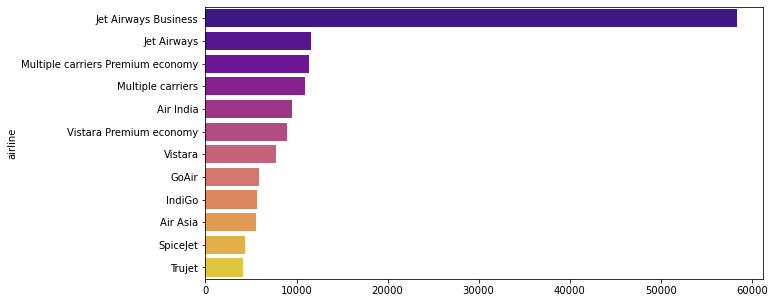

In [32]:
# checking the average price based on airline

grp_air = np.round(df.groupby("airline").mean()["price"]).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=grp_air.values, y=grp_air.index, palette="plasma")
plt.show()

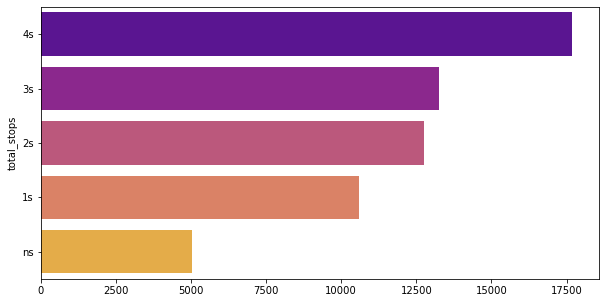

In [33]:
# checking the average price based on total stops

grp_stp = np.round(df.groupby("total_stops").mean()["price"]).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=grp_stp.values, y=grp_stp.index, palette="plasma")
plt.show()

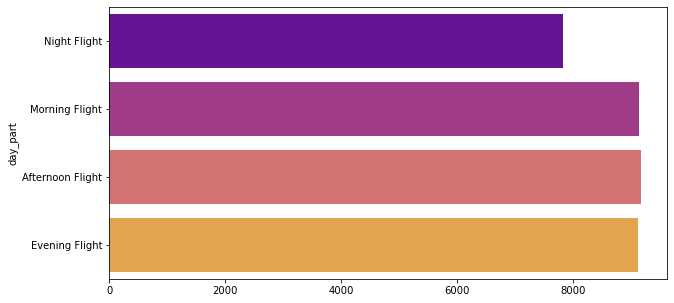

In [34]:
# checking the average price based on day part

grp_prt = np.round(df.groupby("day_part").mean()["price"]).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=grp_prt.values, y=grp_prt.index, palette="plasma")
plt.show()

In [35]:
# encoging the data

for i in cat:
    df[i] = pd.Categorical(df[i]).codes

In [36]:
df.head()

,airline,source,destination,route,duration,total_stops,add_info,price,day,month,day_part
0,3,0,2,18,170,4,8,3897,24,3,0
1,1,3,0,84,445,1,8,7662,5,1,1
2,4,2,1,118,1140,1,8,13882,6,9,1
3,3,3,0,91,325,0,8,6218,5,12,3
4,3,0,2,29,285,0,8,13302,3,1,2


In [38]:
# df.to_csv("clean_train_data.csv")